In [24]:
# Basic packages
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor,VotingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


In [25]:
# Load the CSV file
df = pd.read_csv('Salary_Data.csv')

# Display first 5 rows
df.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# Understand the Data

In [26]:
# Check shape
print("Shape of data:", df.shape)


Shape of data: (6704, 6)


In [27]:
# Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [28]:
# Descriptive statistics
df.describe()


,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [29]:
# Check missing values
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [30]:
# Dropping null values from database

df.dropna(inplace=True)

In [31]:
# Checking unique value counts of Job Titles in the database

df['Job Title'].value_counts()

Job Title
Software Engineer                     518
Data Scientist                        453
Software Engineer Manager             376
Data Analyst                          363
Senior Project Engineer               318
                                     ... 
Junior Research Scientist               1
Senior Product Development Manager      1
Junior Social Media Specialist          1
Senior Software Architect               1
Social Media Man                        1
Name: count, Length: 191, dtype: int64

In [32]:
# Reducing Job titles by omitting titles with less than 25 counts

job_title_count = df['Job Title'].value_counts()
job_title_edited = job_title_count[job_title_count<=25]
job_title_edited.count()

np.int64(142)

In [33]:
# Omitting titles with less than 25 counts

df['Job Title'] = df['Job Title'].apply(lambda x: 'Others' if x in job_title_edited else x )
df['Job Title'].nunique()

50

In [34]:
#Checking unique value count of Education Level

df['Education Level'].value_counts()

Education Level
Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

In [36]:
# Combining repeating values of education level

df['Education Level'].replace(["Bachelor's Degree","Master's Degree","phD"],["Bachelor's","Master's","PhD"],inplace=True)
df['Education Level'].value_counts()

Education Level
Bachelor's     3021
Master's       1860
PhD            1369
High School     448
Name: count, dtype: int64

In [37]:
# Checking Unique Value count of Gender

df['Gender'].value_counts()

Gender
Male      3671
Female    3013
Other       14
Name: count, dtype: int64

# Data Preprocessing

In [38]:
# Encode categorical (non-numeric) variables if any
df = pd.get_dummies(df, drop_first=True)


In [39]:
# Separate features and target
X = df.drop('Salary', axis=1)
y = df['Salary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Ensemble Models

## Random Forest

In [40]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

## Gradient Boosting

In [41]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

## AdaBoost

In [42]:
ada = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

## Voting Regressor

In [43]:
# Create a Voting Regressor using the already defined models
voting = VotingRegressor(estimators=[
    ('rf', rf),
    ('gb', gb),
    ('ada', ada)
])

# Fit the ensemble model on training data
voting.fit(X_train, y_train)

# Predict using Voting Regressor
y_pred_voting = voting.predict(X_test)

# Model Evaluation

In [44]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"---{model_name}---")
    print("R2 Score:", r2_score(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print()

# Evaluate all models
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")
evaluate_model(y_test, y_pred_ada, "AdaBoost")
evaluate_model(y_test, y_pred_voting, "Voting Regressor")


---Random Forest---
R2 Score: 0.973339398998555
MSE: 76021617.2976343
RMSE: 8719.03763597992

---Gradient Boosting---
R2 Score: 0.9107040033171678
MSE: 254623895.60029697
RMSE: 15956.938791644749

---AdaBoost---
R2 Score: 0.800739514690537
MSE: 568183153.7074463
RMSE: 23836.59274534526

---Voting Regressor---
R2 Score: 0.9295229814439332
MSE: 200962346.37235698
RMSE: 14176.11887550175



# Create a Comparison Table for All Models

In [47]:

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'AdaBoost', 'Voting Regressor'],
    'R2 Score': [r2_score(y_test, y_pred_rf),
                 r2_score(y_test, y_pred_gb),
                 r2_score(y_test, y_pred_ada),
                 r2_score(y_test, y_pred_voting)],
    'MSE': [mean_squared_error(y_test, y_pred_rf),
            mean_squared_error(y_test, y_pred_gb),
            mean_squared_error(y_test, y_pred_ada),
            mean_squared_error(y_test, y_pred_voting)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred_rf)),
             np.sqrt(mean_squared_error(y_test, y_pred_gb)),
             np.sqrt(mean_squared_error(y_test, y_pred_ada)),
             np.sqrt(mean_squared_error(y_test, y_pred_voting))]
})

comparison_df


,Model,R2 Score,MSE,RMSE
0,Random Forest,0.973339,7.602162e+07,8719.037636
1,Gradient Boosting,0.910704,2.546239e+08,15956.938792
2,AdaBoost,0.800740,5.681832e+08,23836.592745
3,Voting Regressor,0.929523,2.009623e+08,14176.118876


# Visual Comparison Using Bar Plots

# Plot R2 Score

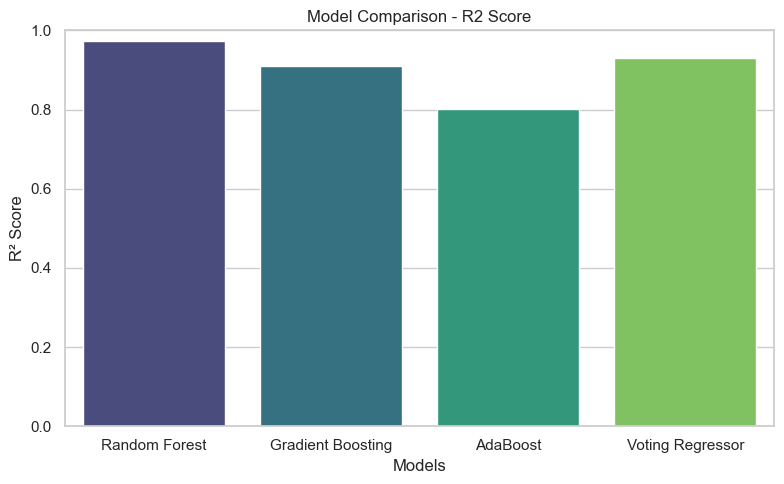

In [68]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='R2 Score', data=comparison_df, hue='Model', palette='viridis', legend=False)
plt.title('Model Comparison - R2 Score')
plt.ylim(0, 1)  # Since R2 is between 0 and 1
plt.ylabel('R² Score')
plt.xlabel('Models')
plt.tight_layout()
plt.show()

# Plot MSE

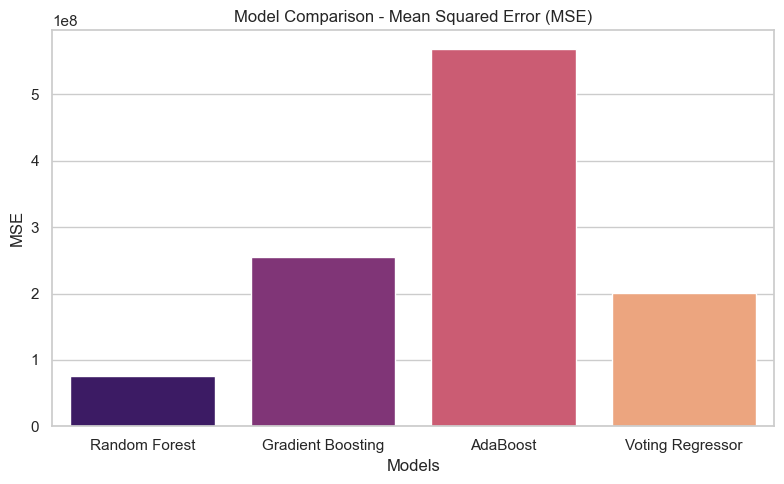

In [55]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='MSE', data=comparison_df, hue='Model', palette='magma', legend=False)
plt.title('Model Comparison - Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xlabel('Models')
plt.tight_layout()
plt.show()

# Plot RMSE

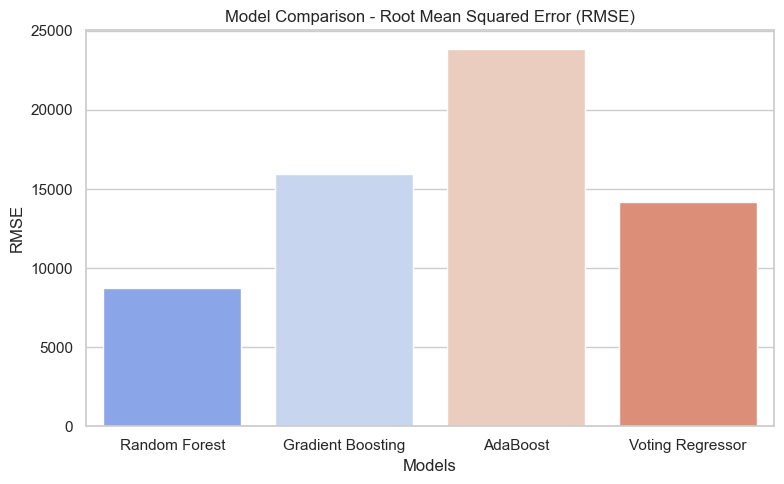

In [56]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='RMSE', data=comparison_df, hue='Model', palette='coolwarm', legend=False)
plt.title('Model Comparison - Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')
plt.xlabel('Models')
plt.tight_layout()
plt.show()

# Model Selection Justification:

After training and evaluating four ensemble learning models — Random Forest, Gradient Boosting, AdaBoost, and Voting Regressor — based on performance metrics such as R² Score, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE), the Random Forest Regressor emerged as the best-performing model.

It achieved the highest R² score of 0.973, indicating strong correlation between actual and predicted values, along with the lowest RMSE of approximately 8719, meaning its predictions were more accurate and consistent compared to other models. Therefore, Random Forest was selected as the final model for salary prediction.

# Visualizing Prediction vs Actual for Chosen Model

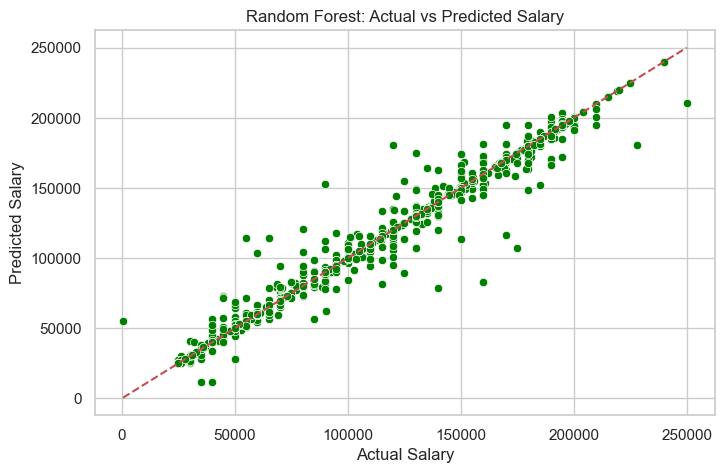

In [60]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_rf, color='green')  # y_pred_rf is prediction from Random Forest
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Random Forest: Actual vs Predicted Salary")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.show()


# Actual vs Predicted Salary Plot (Random Forest)

The scatter plot shows how closely the predicted salaries match the actual salaries. Most of the predictions (green dots) lie near the red reference line (Predicted = Actual), indicating that the model has captured the patterns in the data effectively.

While a few predictions deviate from the ideal line, the overall distribution confirms the strong performance of the Random Forest model, further supported by the high R² score and low RMSE.

# Extract Feature Importances from the Model

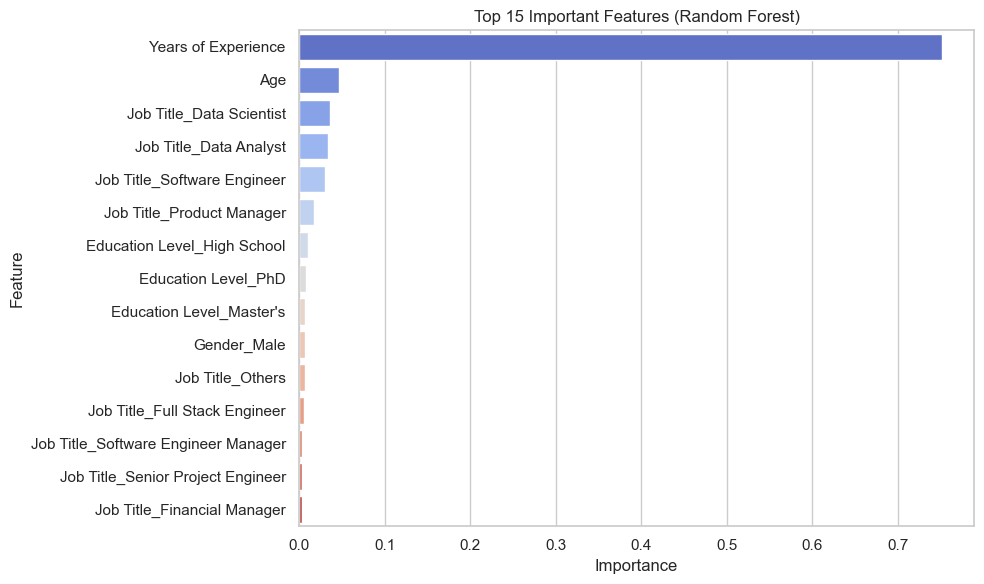

In [65]:
importances = rf.feature_importances_
feature_names = X.columns

# Create DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show only top 15 features
top_n = 15
top_features_df = feature_importance_df.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=top_features_df, 
    hue='Feature',          # Add hue to avoid warning
    palette='coolwarm', 
    legend=False            # Remove legend (since each bar already labeled on y-axis)
)
plt.title(f'Top {top_n} Important Features (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


#  Interpretation:
According to the Random Forest model, Years of Experience is by far the most influential factor in predicting salary. Other features such as Age, Job Title (e.g., Data Scientist, Software Engineer), and Education Level contribute modestly. Meanwhile, several other job titles and gender-related features have very limited influence, indicating that experience outweighs other attributes in determining compensation.

 # Conclusion

This project aimed to predict salaries based on various factors using a dataset containing information on Age, Gender, Education Level, Job Title, and Years of Experience.

Through the analysis, the following key findings and conclusions were drawn:

* **Data Preparation**: The initial dataset underwent necessary cleaning, including handling missing values and consolidating categorical features like 'Job Title' and 'Education Level' to ensure data quality and consistency for modeling.
* **Model Performance**: Several ensemble models were evaluated for their predictive accuracy. The Random Forest Regressor demonstrated the highest performance with an R2 score of approximately 0.9733, indicating that it could explain about 97.33% of the variance in salary. The Voting Regressor also performed well with an R2 score of 0.9295, followed by Gradient Boosting (0.9107) and AdaBoost (0.8007).
* **Feature Importance**: A critical insight from the Random Forest model revealed that 'Years of Experience' is the most influential factor in predicting an individual's salary. 'Age', 'Job Title', and 'Education Level' also contribute to salary prediction, albeit to a lesser extent. Conversely, other specific job titles and gender-related features were found to have minimal influence on salary determination, suggesting that practical experience is the dominant factor in compensation within this dataset.

In conclusion, the Random Forest model proved to be the most effective in accurately predicting salaries, with 'Years of Experience' standing out as the primary determinant. This project successfully identified key factors influencing salary and provided robust predictive models for future use.